In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm_notebook

In [2]:
def section_name_text(section, root):
    texts = []
    for x in root.findall(section):
        
        txt = x.find("textblock").text
        texts.append(txt)
    return texts


def get_all_data(path, section):
    data = []
    nct_ids = []
    for files in tqdm_notebook(os.listdir(path)):
        if files.endswith(".xml"):
    #         print (files)
            tree = ET.parse(path+files)
            root = tree.getroot()
            nct_ids.append(files[:-4])
            data.append(section_name_text(section = section, root = root))
    
    return nct_ids, data

In [3]:
# load NCTids and their text 
path = 'C:\\Users\\Rajat\\Downloads\\oncology_trials\\'

In [4]:
# data = []
# nct_ids = []
# # for files in tqdm_notebook(os.listdir(path)):
# #     if files.endswith(".xml"):
# # #         print (files)
# #         tree = ET.parse(path+files)
# #         root = tree.getroot()
# #         nct_ids.append(files[:-4])
# #         data.append(section_name_text(section = "brief_summary", root = root))
        
        
# # #         break

In [5]:
# nct_ids2, data2 = get_all_data(path = path, section = 'detailed_description')

In [69]:
## need to remove excess whitespace in brief summary and detailed description

In [6]:
# nct_ids3, data3 = get_all_data(path = path, section = './eligibility/criteria')

In [95]:
import pandas as pd

df = pd.DataFrame({"brief_summary":data,  "eligibility":data3})


In [96]:
df.to_pickle("onco_10000_trials_bs_eligi.pkl")

In [ ]:
df2 = pd.DataFrame({"onco_10000_trials_detailed_desc"})

In [4]:
import pandas as pd

df = pd.read_pickle("onco_10000_trials_bs_eligi.pkl")
df2 = pd.read_pickle("onco_10000_trials_detailed_desc.pkl")

In [5]:
df.head()

,brief_summary,eligibility
0,"In 1997, the Genetics Department of the NCI M...",- INCLUSION CRITERIA: At least one of the fol...
1,RATIONALE: Estrogen can stimulate the growth ...,"DISEASE CHARACTERISTICS: Operable, clinical S..."
2,RATIONALE: Drugs used in chemotherapy use dif...,DISEASE CHARACTERISTICS: Histologically confi...
3,RATIONALE: Drugs used in chemotherapy use dif...,DISEASE CHARACTERISTICS: Histologically confi...
4,RATIONALE: Radiation therapy uses high-energy...,DISEASE CHARACTERISTICS: - Histologically or ...


In [6]:
df2.head()

,detailed_desc
0,In October 1995 the National Naval Medical Ce...
1,"OBJECTIVES: I. Determine, in a prospective, r..."
2,OBJECTIVES: I. Determine whether adjuvant che...
3,OBJECTIVES: I. Determine the efficacy of prol...
4,OBJECTIVES: - Determine the maximum dose of e...


In [13]:
import re
from gensim.parsing.preprocessing import strip_multiple_whitespaces
def pad_spl_char(x):
    temp = re.sub("([^A-Za-z0-9])", r" \1 ", x)
    temp = strip_multiple_whitespaces(temp)
    return temp

In [9]:
from flair.data import Dictionary, Sentence
from flair.embeddings import FlairEmbeddings
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus

In [10]:
# try checking embeddings for a word using basic flair embeddings

In [11]:
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

2020-04-11 11:27:47,127 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to C:\Users\Rajat\AppData\Local\Temp\tmp4eb1_jv_


100%|██████████████████████████████████████████████████████████████████| 73034624/73034624 [00:48<00:00, 1506695.92B/s]


2020-04-11 11:28:36,373 copying C:\Users\Rajat\AppData\Local\Temp\tmp4eb1_jv_ to cache at C:\Users\Rajat\.flair\embeddings\news-forward-0.4.1.pt
2020-04-11 11:28:36,448 removing temp file C:\Users\Rajat\AppData\Local\Temp\tmp4eb1_jv_


In [14]:
sent = pad_spl_char(df2['detailed_desc'].iloc[0])

In [16]:
sent = sent.split(" . ")[0]

In [17]:
sent

' In October 1995 the National Naval Medical Center opened the only Department of Defense funded Breast Care Center ( BCC )'

In [18]:
sent = Sentence(sent)

In [19]:
sent

Sentence: "In October 1995 the National Naval Medical Center opened the only Department of Defense funded Breast Care Center ( BCC )" - 21 Tokens

In [20]:
flair_embedding_forward.embed(sent)

[Sentence: "In October 1995 the National Naval Medical Center opened the only Department of Defense funded Breast Care Center ( BCC )" - 21 Tokens]

In [21]:
for token in sent:
    print (token
    print (token.embedding)

Token: 1 In
tensor([-2.8897e-03,  6.4223e-05,  8.0480e-02,  ...,  4.5965e-04,
         7.9184e-03,  5.1303e-02], device='cuda:0')
Token: 2 October
tensor([ 1.1579e-03,  8.8407e-05,  3.3286e-02,  ..., -1.8462e-04,
         4.2262e-04,  1.0005e-02], device='cuda:0')
Token: 3 1995
tensor([-2.4471e-03,  2.6607e-05,  4.0757e-02,  ...,  6.1409e-03,
         5.8941e-04,  2.5543e-03], device='cuda:0')
Token: 4 the
tensor([-0.0008,  0.0010, -0.0087,  ...,  0.0008, -0.0391,  0.0125],
       device='cuda:0')
Token: 5 National
tensor([-4.0181e-03,  1.3420e-04, -4.4264e-02,  ..., -4.6839e-05,
        -7.0476e-02, -9.3853e-03], device='cuda:0')
Token: 6 Naval
tensor([-4.7951e-04,  1.1489e-04,  2.6887e-02,  ..., -6.4646e-05,
         1.9543e-03, -1.4768e-03], device='cuda:0')
Token: 7 Medical
tensor([-0.0028,  0.0004, -0.0013,  ..., -0.0006,  0.0054,  0.0413],
       device='cuda:0')
Token: 8 Center
tensor([ 0.0005, -0.0003, -0.0644,  ..., -0.0023,  0.0016,  0.0045],
       device='cuda:0')
Token: 9 

In [ ]:
from scipy.spatial.distance import cosine

In [23]:

flair_embedding_backward = FlairEmbeddings('news-backward')

2020-04-11 11:37:02,309 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to C:\Users\Rajat\AppData\Local\Temp\tmps0ps2_37


100%|██████████████████████████████████████████████████████████████████| 73034575/73034575 [00:26<00:00, 2808648.51B/s]


2020-04-11 11:37:29,140 copying C:\Users\Rajat\AppData\Local\Temp\tmps0ps2_37 to cache at C:\Users\Rajat\.flair\embeddings\news-backward-0.4.1.pt
2020-04-11 11:37:29,214 removing temp file C:\Users\Rajat\AppData\Local\Temp\tmps0ps2_37


In [26]:
df2['detailed_desc'] = df2['detailed_desc'].apply(pad_spl_char)
df['brief_summary'] = df['brief_summary'].apply(pad_spl_char)
df['eligibility'] = df['eligibility'].apply(pad_spl_char)

In [33]:
def create_train_test_text(df, colname, split = 7000):
    
    train_txt = " . ".join(df[colname].iloc[:split])
    test_txt = " . ".join(df[colname].iloc[split:])
    
    return train_txt, test_txt

In [62]:
train1, test1 = create_train_test_text(df2, 'detailed_desc')
train2, test2 = create_train_test_text(df, 'brief_summary')
train3, test3 = create_train_test_text(df, 'eligibility')

In [71]:
with open("./corpus/train/train_split_1.txt", "w+", encoding="utf-8") as f:
    f.write(train1)
    f.close()
    
with open("./corpus/train/train_split_2.txt", "w+", encoding="utf-8") as f:
    f.write(train2)
    f.close()
    
with open("./corpus/train/train_split_3.txt", "w+", encoding="utf-8") as f:
    f.write(train3)
    f.close()
    
    
with open("./corpus/test.txt", "w+", encoding="utf-8") as f:
    f.write(test1)
    f.close()
    
with open("./corpus/valid.txt", "w+", encoding="utf-8") as f:
    f.write(test2)
    f.close()

In [64]:
# def replace_non_utf_signs(x):
    
#     string = re.sub(r"\u2265", "greater than or equal to", x)
#     string = re.sub(r"\u2264", "less than or equal to", string)
    
#     return string

In [67]:
os.listdir("./corpus/")

['.ipynb_checkpoints', 'test', 'train']

In [ ]:
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus


# instantiate an existing LM, such as one from the FlairEmbeddings
language_model = FlairEmbeddings('news-forward').lm

# are you fine-tuning a forward or backward LM?
is_forward_lm = language_model.is_forward_lm

# get the dictionary from the existing language model
dictionary: Dictionary = language_model.dictionary

# get your corpus, process forward and at the character level
corpus = TextCorpus('./corpus',
                    dictionary,
                    is_forward_lm,
                    character_level=True)

# use the model trainer to fine-tune this model on your corpus
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('./language_model',
              sequence_length=100,
              mini_batch_size=100,
              learning_rate=20,
              patience=10,
              checkpoint=True)

2020-04-11 12:15:27,404 read text file with 1 lines
2020-04-11 12:15:40,564 read text file with 1 lines
2020-04-11 12:17:11,612 Sequence length is 100
2020-04-11 12:17:11,705 Split 1	 - (12:17:11)
2020-04-11 12:17:53,375 | split   1 /  3 |   100/ 1158 batches | ms/batch 416.61 | loss  0.95 | ppl     2.58
2020-04-11 12:18:34,881 | split   1 /  3 |   200/ 1158 batches | ms/batch 415.05 | loss  0.86 | ppl     2.37
2020-04-11 12:19:16,244 | split   1 /  3 |   300/ 1158 batches | ms/batch 413.61 | loss  0.82 | ppl     2.28
2020-04-11 12:19:57,858 | split   1 /  3 |   400/ 1158 batches | ms/batch 416.13 | loss  0.82 | ppl     2.27
2020-04-11 12:20:39,626 | split   1 /  3 |   500/ 1158 batches | ms/batch 417.67 | loss  0.80 | ppl     2.23
2020-04-11 12:21:21,567 | split   1 /  3 |   600/ 1158 batches | ms/batch 419.39 | loss  0.79 | ppl     2.21
2020-04-11 12:22:03,423 | split   1 /  3 |   700/ 1158 batches | ms/batch 418.51 | loss  0.77 | ppl     2.15
2020-04-11 12:22:45,107 | split   1 /  3

2020-04-11 13:05:41,837 ('\nBreast Magnetic Resonance ® ( FBA - DE ) extends the feasibility and minimally invasive tract bladder placement of patients that fit find out actual lung tumors ( particularly NSCLC ) , whereas clinical scores consist of a 3 patient remaining disease and for those who can be recruited a competent patient treatment of the oproxically divided Armitate implementation site . Study design : ( 2 ) diagnostic procedures and recruitment procedures will constitute : Current trial evaluation of local recurrence rate ( defined as blood pressure and SNB ) in endometrial cancer patients with gemcitabine and Cyclosporine and carboplatin .  .  This study evaluates the effect of trastuzumab when given with iMMD2012 and effect ( delivered later ) . Currently used effects that may depress the amount of administration Herceptin can be seen while recovering from the side effects and to stop tumor cells from growing . REQ 21 is a prospective , randomized , double blind , populat

2020-04-11 13:56:15,798 | split   1 /  3 |  1100/ 1158 batches | ms/batch 416.02 | loss  0.64 | ppl     1.89
2020-04-11 13:56:39,606 480 seconds for train split 1
2020-04-11 13:57:06,899 best loss so far  0.72
2020-04-11 13:57:09,385 ('\nOver the past 80 - 79 days , R & D findings revealed that the AI is biologically highly immune constructed to the incidence of unusa targets . By investigating a variety of results for cancer therapy ) , eligible patients have been diagnosed with a strong induction chemotherapy and neoadjuvant treatment . We hypothesize that this finding indicates that a minimum of 3 patients per year have undergone cancer - related complications with each individual performance status is greater than 20 ng [ 2 ] . However , more than 20 % of the comparisons of radiotherapy alone increase rates of recurrence in patients treated with these regimens . Early diagnosis but determined its clinical benefit would lead to one chemotherapy strategy before surgery progress in th

2020-04-11 14:39:26,180 | split   1 /  3 |   800/ 1158 batches | ms/batch 415.74 | loss  0.64 | ppl     1.89
2020-04-11 14:40:07,778 | split   1 /  3 |   900/ 1158 batches | ms/batch 415.98 | loss  0.63 | ppl     1.88
2020-04-11 14:40:49,358 | split   1 /  3 |  1000/ 1158 batches | ms/batch 415.79 | loss  0.63 | ppl     1.88
2020-04-11 14:41:30,945 | split   1 /  3 |  1100/ 1158 batches | ms/batch 415.86 | loss  0.65 | ppl     1.91
2020-04-11 14:41:54,731 480 seconds for train split 1
2020-04-11 14:42:22,008 best loss so far  0.71
2020-04-11 14:42:24,495 ("\nAT THE END OF 2013 THROUGH 1999 , THE PREVIOUS BIOLOGY STUDY THAT WILL HAVE IMPAIRED RATE OF NORMAL TISSUE SITES , BLOCKS , AND THE NATION ' S RESULTS . THOSE INITIALLY DETECTED BY HISTORY DIAGNOSES OCCURR AND THE HARD COPY NUMBER OF THE STEP IN THE DIAGNOSIS , DOES NOT APPLY AS CONTROLLED BY MAMMOGRAPHY . FOR AT LEAST 3 MONTHS , INTERVENTIONS TO MEASURE THE THREE SCALES COORDINATOR ' S SATISFACTION WITH CHEMOTHERAPY ( CYCLE 4 , DA

2020-04-11 15:22:24,488 ('\nThe study treatment consists of subjects with hypothesis that it could be a tolerable dose of additional treatment where it should be completed . * This Phase 2 study will assess research assessments assessing time to progression free survival at 3 month in the Phase 1 portion of the study comparing the effect of neoadjuvant trastuzumab and vadically translated worse perceptions to drugs used in chemotherapy and radiation therapy ( HRT ) as appropriate for its genotype , amplification , and stratification indicators with clinical and biological characteristics at two time points . - Systematic prostate brachytherapy , safety , pharmacokinetic ( PD ) and pharmacodynamic toxicity when added to maintenance APBI - 999 in subjects with metastatic colorectal cancer .  .  This study intently analyzes the efficacy and safety of LEE011 - MiRO - PET and MESEPARA . In patients with NSCLC , the primary objective of this study is to determine progression free survival in

In [51]:
len(nct_ids) == len(nct_ids2), len(nct_ids)

(True, 10000)

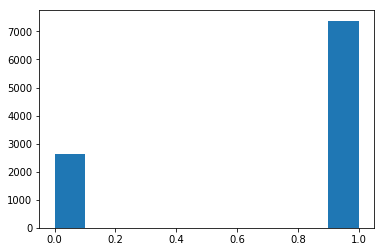

In [66]:
import matplotlib.pyplot as plt
plt.hist([len(x) for x in data2])
plt.show()

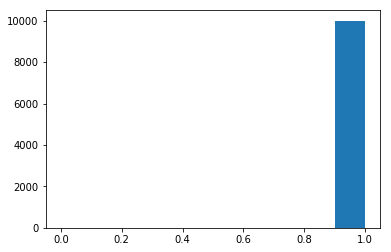

In [71]:
plt.hist([len(x) for x in data3])
plt.show()

In [73]:
data = [strip_multiple_whitespaces(x) for sublist in data for x in sublist]

In [74]:
data2 = [strip_multiple_whitespaces(x) for sublist in data2 for x in sublist]

In [75]:
data3 = [strip_multiple_whitespaces(x) for sublist in data3 for x in sublist]

In [78]:
len(data), len(data2), len(data3)

(9999, 7381, 9999)

In [79]:
# from gensim.models.fasttext import FastText as FT_gensim
# from gensim.test.utils import datapath

# # Set file names for train and test data
# # corpus_file = datapath('lee_background.cor')

# model = FT_gensim(size=100)

In [85]:
import fasttext.util
import fasttext

In [87]:
# fasttext.util.download_model('en', if_exists='ignore')